In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv("iot_dataset.csv")
data.head(5)

,Sl.No,Patient ID,Temperature Data,ECG Data,Pressure Data,Target
0,1,1,32,0,77,1
1,2,2,32,0,77,1
2,3,1,32,16,77,1
3,4,2,32,0,77,1
4,5,1,32,18,77,1


In [6]:
data.shape

(150, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Sl.No             150 non-null    int64
 1   Patient ID        150 non-null    int64
 2   Temperature Data  150 non-null    int64
 3   ECG Data          150 non-null    int64
 4   Pressure Data     150 non-null    int64
 5   Target            150 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [8]:
data.isnull().sum()

Sl.No               0
Patient ID          0
Temperature Data    0
ECG Data            0
Pressure Data       0
Target              0
dtype: int64

In [9]:
data['Target'].value_counts()

Target
0    59
1    56
2    35
Name: count, dtype: int64

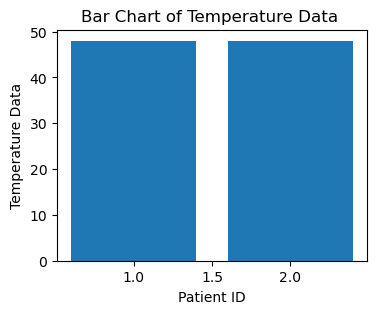

In [14]:
plt.figure(figsize=(4,3))
plt.bar(data['Patient ID'],Input_data['Temperature Data']) 
plt.title("Bar Chart of Temperature Data ") 
plt.xlabel('Patient ID')
plt.ylabel('Temperature Data')
plt.show()

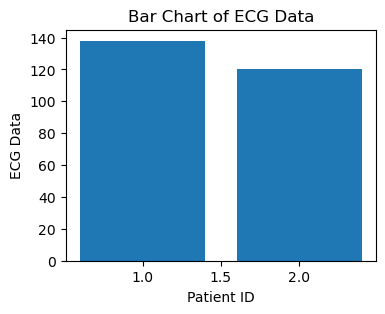

In [21]:
plt.figure(figsize=(4,3))
plt.bar(data['Patient ID'],Input_data['ECG Data']) 
plt.title("Bar Chart of ECG Data") 
plt.xlabel('Patient ID')
plt.ylabel('ECG Data')
plt.show()

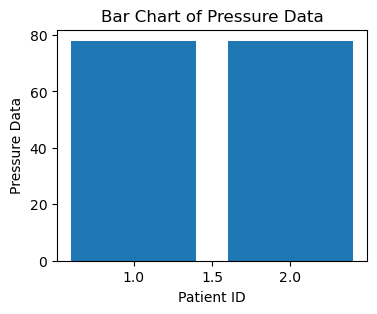

In [20]:
plt.figure(figsize=(4,3))
plt.bar(data['Patient ID'],Input_data['Pressure Data']) 
plt.title("Bar Chart of Pressure Data") 
plt.xlabel('Patient ID')
plt.ylabel('Pressure Data')
plt.show()

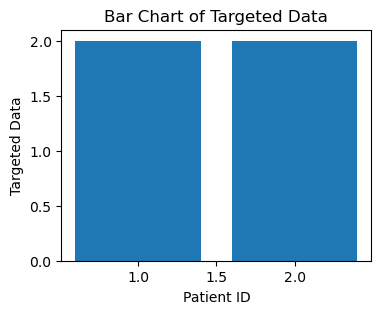

In [19]:
plt.figure(figsize=(4,3))
plt.bar(data['Patient ID'],Input_data['Target']) 
plt.title("Bar Chart of Targeted Data") 
plt.xlabel('Patient ID')
plt.ylabel('Targeted Data')
plt.show()

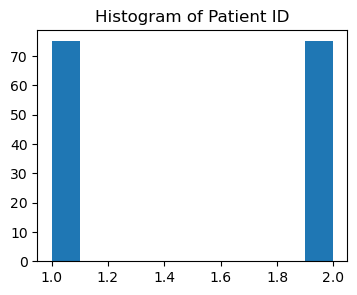

In [24]:
plt.figure(figsize=(4,3))
plt.hist(data['Patient ID'])
plt.title("Histogram of Patient ID")
plt.show()

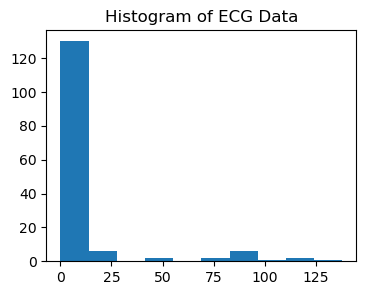

In [26]:
plt.figure(figsize=(4,3))
plt.hist(data['ECG Data'])
plt.title("Histogram of ECG Data")
plt.show()

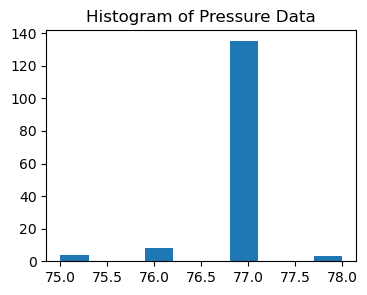

In [27]:
plt.figure(figsize=(4,3))
plt.hist(data['Pressure Data'])
plt.title("Histogram of Pressure Data")
plt.show()

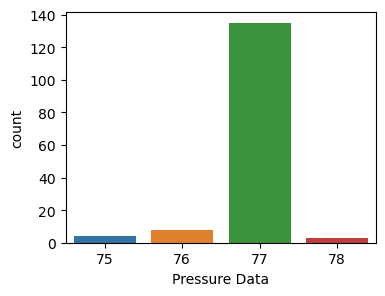

In [29]:
plt.figure(figsize=(4,3))
sns.countplot(x ='Pressure Data', data=data)
 
# Show the plot
plt.show()

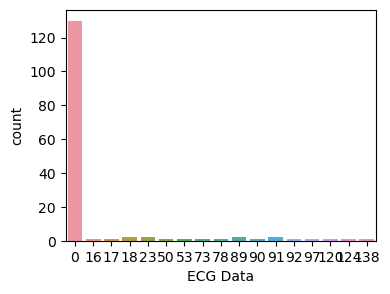

In [30]:
plt.figure(figsize=(4,3))
sns.countplot(x ='ECG Data', data =data)
 
# Show the plot
plt.show()

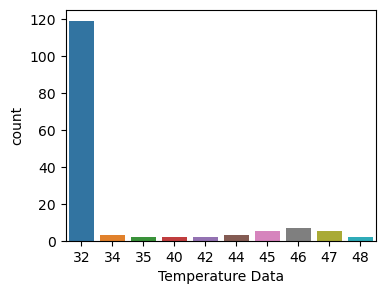

In [31]:
plt.figure(figsize=(4,3))
sns.countplot(x ='Temperature Data', data = data)
 
# Show the plot
plt.show()

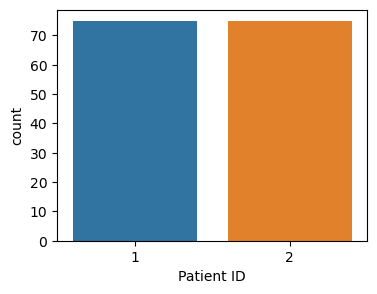

In [32]:
plt.figure(figsize=(4,3))
# count plot on single categorical variable
sns.countplot(x ='Patient ID', data = data)
 
# Show the plot
plt.show()

<Axes: xlabel='Patient ID', ylabel='Density'>

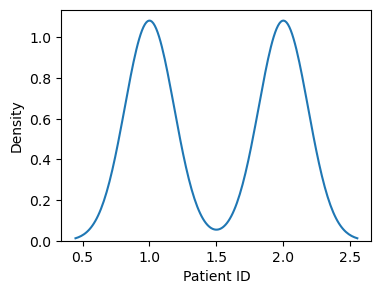

In [33]:
plt.figure(figsize=(4,3))
sns.kdeplot(data['Patient ID'])

<Axes: xlabel='Temperature Data', ylabel='Density'>

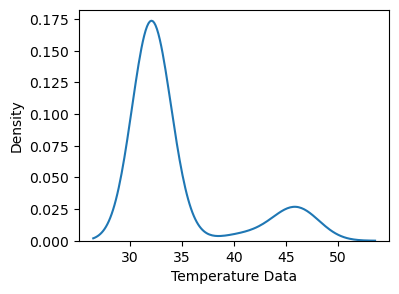

In [34]:
plt.figure(figsize=(4,3))
sns.kdeplot(data['Temperature Data'])

<Axes: xlabel='ECG Data', ylabel='Density'>

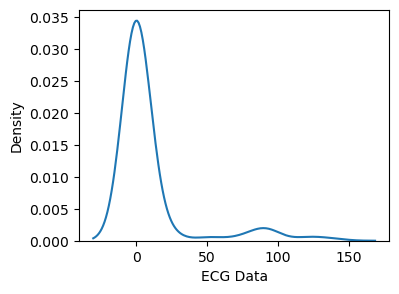

In [35]:
plt.figure(figsize=(4,3))
sns.kdeplot(data['ECG Data'])

<Axes: xlabel='Pressure Data', ylabel='Density'>

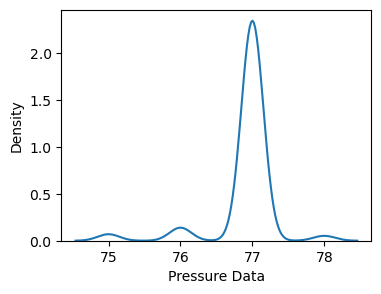

In [36]:
plt.figure(figsize=(4,3))
sns.kdeplot(data['Pressure Data'])

<Axes: xlabel='Target', ylabel='Density'>

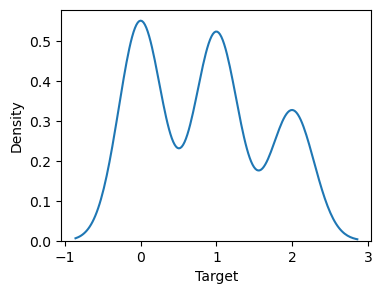

In [38]:
plt.figure(figsize=(4,3))
sns.kdeplot(data['Target'])

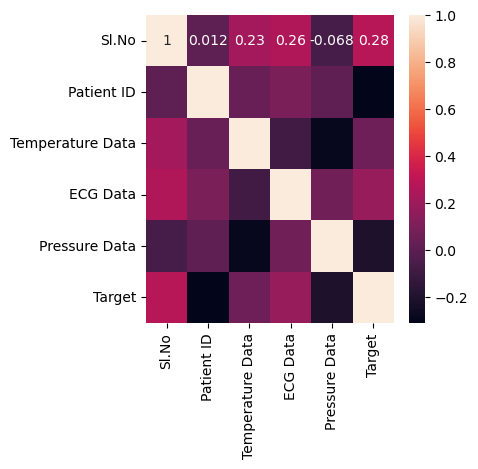

In [43]:
import seaborn as sns
corr = data.corr()
plt.subplots(figsize=(4,4)) 
sns.heatmap(corr, annot=True, annot_kws={"size": 10})  
plt.show()

In [47]:
## MODEL IMPLEMENTATION

In [49]:
X = data.drop('Target',axis=1)
X.head(5)

,Sl.No,Patient ID,Temperature Data,ECG Data,Pressure Data
0,1,1,32,0,77
1,2,2,32,0,77
2,3,1,32,16,77
3,4,2,32,0,77
4,5,1,32,18,77


In [50]:
Y = data['Target']
Y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: Target, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 =  train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)

In [52]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn import metrics
NB_Algorithm = MultinomialNB()
NB_Algorithm.fit(x_train1, y_train1)
NB_Algorithm_Prediction = NB_Algorithm.predict(x_test1)
Accuracy_NB = metrics.accuracy_score(y_test1, NB_Algorithm_Prediction)
print('Accuracy of Naive Bayes Algorithm', Accuracy_NB)

Accuracy of Naive Bayes Algorithm 0.3


In [53]:
NB_Algorithm_Prediction

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0], dtype=int64)

In [54]:
##Classification report and Confusion matrix of Naive Bayes Algorithm

              precision    recall  f1-score   support

           0       0.27      0.78      0.40         9
           1       0.00      0.00      0.00        11
           2       0.67      0.20      0.31        10

    accuracy                           0.30        30
   macro avg       0.31      0.33      0.24        30
weighted avg       0.30      0.30      0.22        30



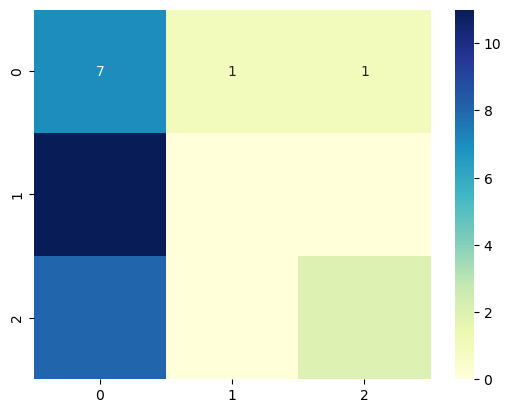

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
CM_NB=confusion_matrix(y_test1, NB_Algorithm_Prediction)
sns.heatmap(CM_NB, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, NB_Algorithm_Prediction))

In [56]:
## Decision Tree Algorithm

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
DT_Algorithm = DecisionTreeClassifier()
DT_Algorithm.fit(x_train1, y_train1)
DT_Algorithm_Prediction = DT_Algorithm.predict(x_test1)
Accuracy_DT = accuracy_score(y_test1, DT_Algorithm_Prediction)
print('Accuracy of Decision Tree Algorithm', Accuracy_DT)

Accuracy of Decision Tree Algorithm 0.6666666666666666


In [58]:
DT_Algorithm_Prediction

array([0, 1, 2, 1, 1, 0, 2, 0, 1, 1, 2, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 1,
       1, 1, 1, 1, 2, 1, 0, 1], dtype=int64)

In [59]:
###Classification report and Confusion matrix of Decision Tree Algorithm

              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.62      0.91      0.74        11
           2       0.67      0.40      0.50        10

    accuracy                           0.67        30
   macro avg       0.68      0.66      0.65        30
weighted avg       0.68      0.67      0.65        30



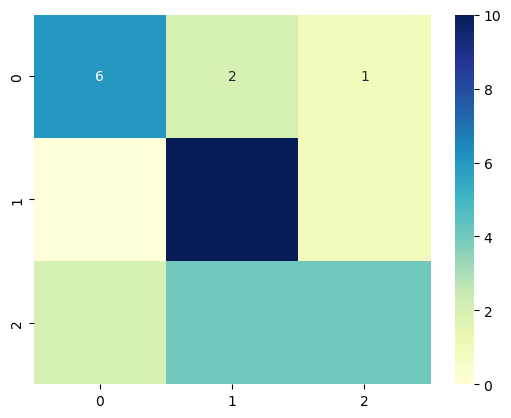

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
CM_DT=confusion_matrix(y_test1, DT_Algorithm_Prediction)
sns.heatmap(CM_DT, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, DT_Algorithm_Prediction))

In [ ]:
## Logistic Regression Algorithm

In [61]:
from sklearn.linear_model import LogisticRegression
LR_Algorithm = LogisticRegression()
LR_Algorithm.fit(x_train1, y_train1)
LR_Algorithm_Prediction = LR_Algorithm.predict(x_test1)
Accuracy_LR = accuracy_score(y_test1, LR_Algorithm_Prediction)
print('Accuracy of Logistic Regression Algorithm', Accuracy_LR)

Accuracy of Logistic Regression Algorithm 0.5333333333333333


In [62]:
LR_Algorithm_Prediction

array([0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0,
       1, 2, 0, 0, 2, 2, 0, 1], dtype=int64)

In [63]:
## Classification report and Confusion matrix of Logistic Regression Algorithm

              precision    recall  f1-score   support

           0       0.50      0.56      0.53         9
           1       0.47      0.64      0.54        11
           2       0.80      0.40      0.53        10

    accuracy                           0.53        30
   macro avg       0.59      0.53      0.53        30
weighted avg       0.59      0.53      0.53        30



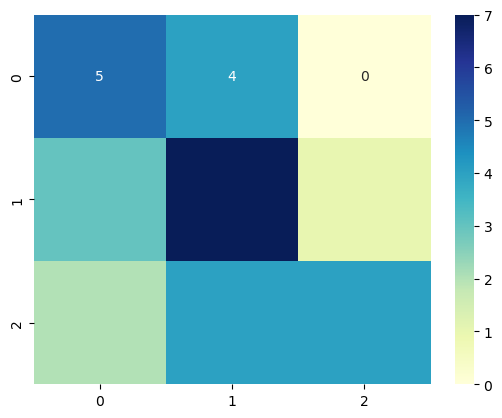

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
CM_LR=confusion_matrix(y_test1, LR_Algorithm_Prediction)
sns.heatmap(CM_LR, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, LR_Algorithm_Prediction))

In [65]:
## Support Vector Machine Algorithm

In [66]:
from sklearn.svm import SVC
SVM_Algorithm = SVC()
SVM_Algorithm.fit(x_train1, y_train1)
SVM_Algorithm_Prediction = SVM_Algorithm.predict(x_test1)
Accuracy_SVM = accuracy_score(y_test1, LR_Algorithm_Prediction)
print('Accuracy of Support Vector Machine Algorithm', Accuracy_SVM)

Accuracy of Support Vector Machine Algorithm 0.5333333333333333


In [67]:
SVM_Algorithm_Prediction

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [68]:
## Classification report and Confusion matrix of Support Vector Machine Algorithm

              precision    recall  f1-score   support

           0       0.29      0.56      0.38         9
           1       0.50      0.55      0.52        11
           2       0.00      0.00      0.00        10

    accuracy                           0.37        30
   macro avg       0.26      0.37      0.30        30
weighted avg       0.27      0.37      0.31        30



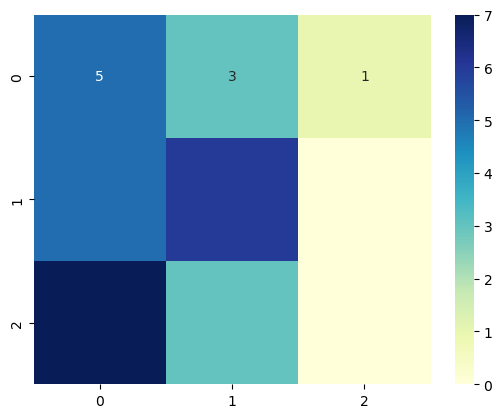

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
CM_SVM=confusion_matrix(y_test1, SVM_Algorithm_Prediction)
sns.heatmap(CM_SVM, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, SVM_Algorithm_Prediction))

In [70]:
## Comparison Plot of all the Graph

Text(0.5, 1.0, 'Comparison Graph of all the Algorithm')

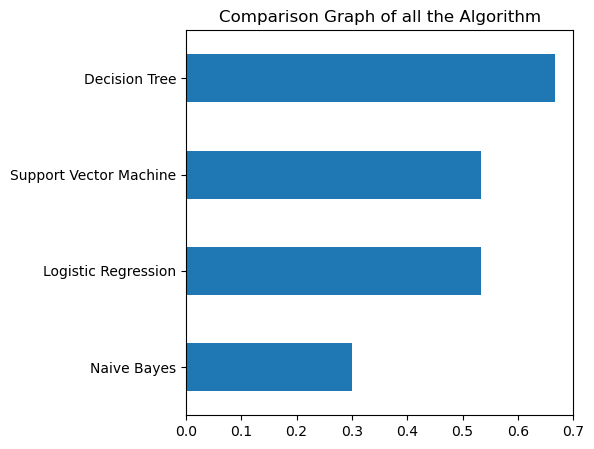

In [71]:
model_accuracy = pd.Series(data=[Accuracy_NB,Accuracy_DT,Accuracy_LR,Accuracy_SVM], 
                index=['Naive Bayes','Decision Tree','Logistic Regression','Support Vector Machine'])
fig= plt.figure(figsize=(5,5))
model_accuracy.sort_values().plot.barh()
plt.title('Comparison Graph of all the Algorithm')

In [72]:
##Final Prediction Model

In [73]:
Final_Prediction_data = (71,1,32,0,77)
Final_Prediction_data = np.array(Final_Prediction_data)
Final_Prediction_data = Final_Prediction_data.reshape(1,-1)
Final_prediction = DT_Algorithm.predict(Final_Prediction_data)

if Final_prediction == 0:
    print("The Patient Condition is Low")
elif Final_prediction == 1:
    print("The Patient Condition is Medium")
else:
    print("The Patient Condition is High")

The Patient Condition is High


In [74]:
Final_Prediction_data = (10,2,32,0,77)
Final_Prediction_data = np.array(Final_Prediction_data)
Final_Prediction_data = Final_Prediction_data.reshape(1,-1)
Final_prediction = DT_Algorithm.predict(Final_Prediction_data)

if Final_prediction == 0:
    print("The Patient Condition is Low")
elif Final_prediction == 1:
    print("The Patient Condition is Medium")
else:
    print("The Patient Condition is High")

The Patient Condition is Medium


In [75]:
Final_Prediction_data = (43,1,32,0,77)
Final_Prediction_data = np.array(Final_Prediction_data)
Final_Prediction_data = Final_Prediction_data.reshape(1,-1)
Final_prediction = DT_Algorithm.predict(Final_Prediction_data)

if Final_prediction == 0:
    print("The Patient Condition is Low")
elif Final_prediction == 1:
    print("The Patient Condition is Medium")
else:
    print("The Patient Condition is High")

The Patient Condition is High


In [76]:
data.head(3)

,Sl.No,Patient ID,Temperature Data,ECG Data,Pressure Data,Target
0,1,1,32,0,77,1
1,2,2,32,0,77,1
2,3,1,32,16,77,1
